1c) Consider a population with four equal-sized groups, numbered 1, 2, 3, 4. Suppose that the contact
structure in the population is fully mixed (i.e. cij = ¯c for all i, j), that γi = 3 for all i, and that
R0 = 1.5, under SIR dynamics. Finally, suppose that the susceptibility for group 1 is p1 = 1, the
susceptibility for group 2 is p2 = 2, with p3 = 3 and p4 = 4.
Using these parameters, code up a version of your model with initial conditions where 99.9%
of people in each group are susceptible, and the other 0.1% are infected.1 Simulate an epidemic
wave using an appropriate timestep ∆t and appropriate maximum simulation time to capture the
wave. Create a plot of the four populations’ I compartments vs time, showing i1(t), i2(t), i3(t),
and i4(t). Color these curves in a single hue, but with varying levels of light/dark or saturation,
such that the boldest and darkest line is the most susceptible group, and the faintest and lightest
line is the least susceptible group.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

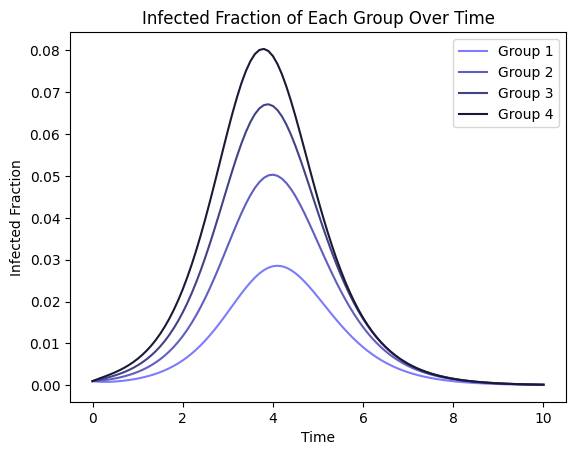

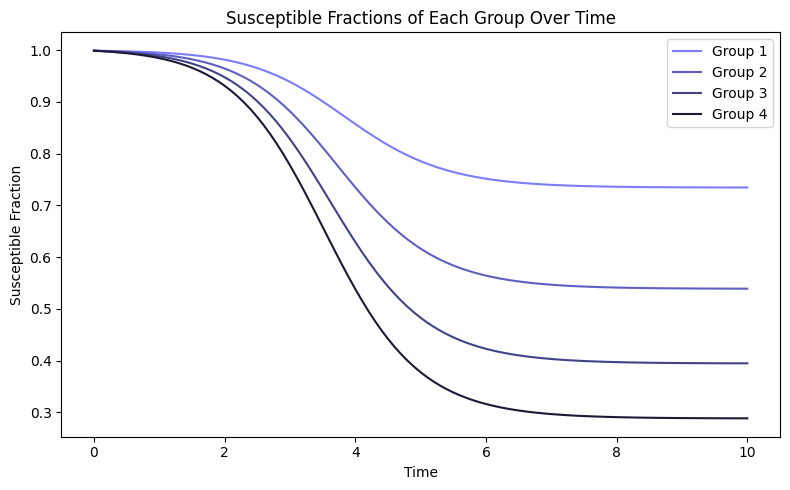

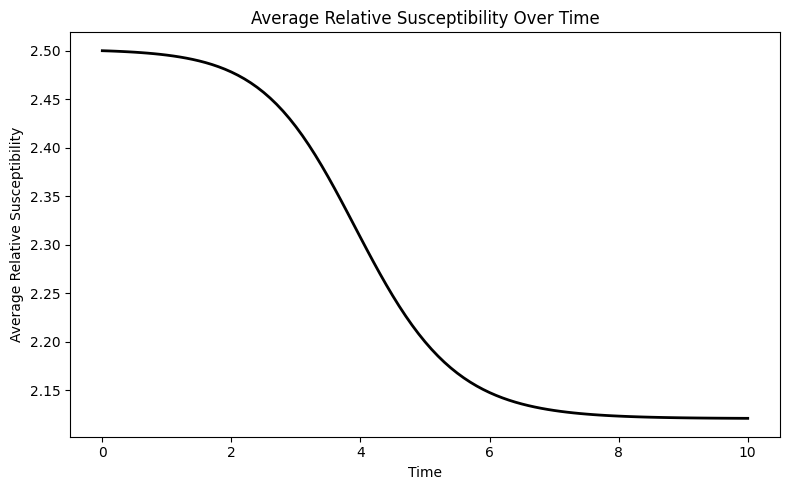

In [17]:
gamma = 3
R0 = 1.5
p = np.array([1,2,3,4])
c_bar = 0.45
n_groups = 4

# Set initial conditions: 99.9% S, 0.1% I
s0 = np.full(n_groups, 0.999)
i0 = np.full(n_groups, 0.001)

t_max = 10
dt = 0.1
T = np.arange(0, t_max+dt, dt)

s = np.zeros((len(T), n_groups))
i = np.zeros((len(T), n_groups))
r = np.zeros((len(T), n_groups))

# Run SIR simulation solving w/ forward Euler
for idx, t in enumerate(T):
  if idx == 0:
    s[idx] = s0
    i[idx] = i0
  else:
    ds_dt = -c_bar * p * s[idx-1] * np.sum(i[idx-1])
    di_dt =  c_bar * p * s[idx-1] * np.sum(i[idx-1]) - gamma * i[idx-1]
    dr_dt = gamma * i[idx-1]
    s[idx] = s[idx-1] + dt * ds_dt
    i[idx] = i[idx-1] + dt * di_dt
    r[idx] = r[idx-1] + dt * dr_dt

# plot
colors = ['#7c7cfc', '#5f5fc2', '#424287', '#1a1a36']

# plot infected for each group
fig, ax = plt.subplots()
for idx, color in enumerate(colors):
    ax.plot(T, i[:, idx], color=color, label=f'Group {idx+1}')
ax.set_xlabel('Time')
ax.set_ylabel('Infected Fraction')
ax.set_title('Infected Fraction of Each Group Over Time')
ax.legend()
plt.savefig('infected_fraction.png')
plt.show()

# plot suseptibles
fig, ax = plt.subplots(figsize=(8,5))
for idx, color in enumerate(colors):
    ax.plot(T, s[:, idx], color=color, label=f'Group {idx+1}')
ax.set_xlabel('Time')
ax.set_ylabel('Susceptible Fraction')
ax.set_title('Susceptible Fractions of Each Group Over Time')
ax.legend()
plt.tight_layout()
plt.savefig('susceptible_fraction.png')
plt.show()

# plot average susceptibility
p_bar = np.sum(p * s, axis=1) / np.sum(s, axis=1)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(T, p_bar, color='black', linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('Average Relative Susceptibility')
ax.set_title('Average Relative Susceptibility Over Time')
plt.tight_layout()
plt.savefig('average_relative_susceptibility.png')
plt.show()









1e. Comment on what you observe in the plots, and explain the reason for the patterns in words that
a high school student could understand

For the plot of the infected fraction of each group over time, groups with higher suseptibility have larger and earlier peaks of infection. This happens becasue they are more likely to be infected, that is, groups that are more suseptible will get sick faster. This is also why for the plot of the fraction of each group suseptible over time, groups with higher suseptibility lose suseptibilites quicker. For the plot of average relative suseptibility over time, the depletion of suseptibles across groups causes the average relative suseptibility to decrease over time because there are less suseptibles in the population overall.


In the context of the COVID-19 pandemic, this explains why there were different waves of the pandemic as groups with varying suseptibility each reached their own epidemic peak.





2a. Write code for a branching process that, starting from a single infection, draws G generations,
with each infection creating NB(R0, k) additional infections. Use your code to estimate q the
probability that an epidemic dies in finite time, for R0 = 3 and k = 0.1, 0.5, 1.0, 5.0, and
10.0. Provide your answers in a table, out to 3 decimal places.

In [5]:
from scipy.stats import nbinom

def negative_binomial(R0, k, n_draws):
  """
  Make n_draws draws from a negative binomial distribution
  parametized by mean = R0 and dispersion = k
  """

  mean = R0
  variance = mean + (mean**2)/k
  p = mean/variance
  n = mean**2 / (variance - mean)

  draws = nbinom.rvs(n=n,p=p,size=n_draws)
  return draws


R0=3
n_sims = 10000
generations = 10

for k in [0.1, 0.5, 1.0, 5.0, 10.0]:
  infected = np.zeros(generations, dtype=int)
  died_in_finite_time = 0
  for sim in range(n_sims):
    infected[0] = 1
    for i in range(1, (len(infected))):

      if infected[i-1] == 0:  # epidemic died if prev gen had no infections
        died_in_finite_time +=1
        break

      elif infected[i-1] > 1000: # epidemic does not die if prev gen has > 1000 infections
        break

      else:
        infected[i] = np.sum(negative_binomial(R0, k, infected[i-1]))

  q = died_in_finite_time/n_sims
  print(f"k={k}: q: {q:.3f}")


k=0.1: q: 0.842
k=0.5: q: 0.499
k=1.0: q: 0.339
k=5.0: q: 0.123
k=10.0: q: 0.088


2b. How does k affect q? Explain what this means in terms of the relationship between p (i.e., 1 − q)
and superspreading.

A larger dispersion parameter (k) results in a lower probability that an outbreak dies out (q), meaning that the probability of an outbreak not dying out (p=1-q) increases. This is because when k is large, the number of secondary infections per person is less variable resulting in most infected individuals transmitting the virus to around R0.
Conversely, a smaller k produces greater variability in secondary infections because most infected individuals cause few or no secondary infections, while a few superspreaders cause many more than R0. This makes it more likely that transmission chains die out by chance, even when R0>1.


2c. How large do finite outbreaks get before they die out? For the parameters above, and for only
the finite outbreaks, plot a histogram of 100,000 finite outbreaks for your choice or choices of
k, and R0 = 3. What do you observe?

0 finite outbreaks recorded...
5000 finite outbreaks recorded...
5000 finite outbreaks recorded...
5000 finite outbreaks recorded...
5000 finite outbreaks recorded...
5000 finite outbreaks recorded...
5000 finite outbreaks recorded...
10000 finite outbreaks recorded...
15000 finite outbreaks recorded...
20000 finite outbreaks recorded...
25000 finite outbreaks recorded...
30000 finite outbreaks recorded...
30000 finite outbreaks recorded...
30000 finite outbreaks recorded...
35000 finite outbreaks recorded...
35000 finite outbreaks recorded...
35000 finite outbreaks recorded...
35000 finite outbreaks recorded...
35000 finite outbreaks recorded...
40000 finite outbreaks recorded...
45000 finite outbreaks recorded...
45000 finite outbreaks recorded...
50000 finite outbreaks recorded...
50000 finite outbreaks recorded...
50000 finite outbreaks recorded...
50000 finite outbreaks recorded...
55000 finite outbreaks recorded...
55000 finite outbreaks recorded...
55000 finite outbreaks recorde

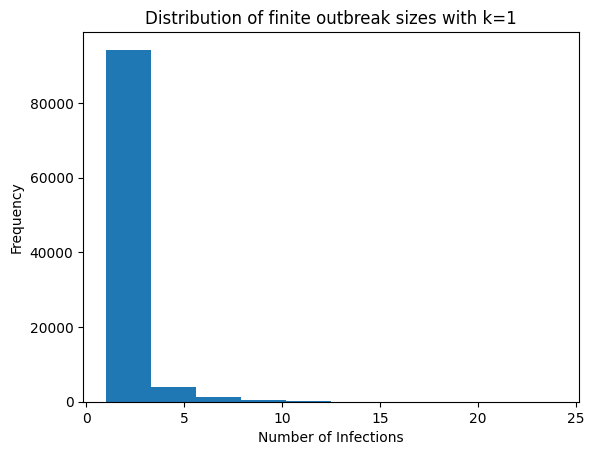

In [37]:
finite_outbreaks = []
n_finite_outbreaks = 100000

k=1
R0=3
generations = 50

while len(finite_outbreaks) < n_finite_outbreaks:
  infected = np.zeros(generations, dtype=int)
  infected[0] = 1 # one initial infection
  for i in range(1, generations):
    if infected[i-1] == 0:  # epidemic died if prev gen had no infections
      #print(f"Outbreak died in {i-1} generations")
      finite_outbreaks.append(np.sum(infected))
      break
    elif infected[i-1] > 10000: # epidemic does not die if prev gen has > 10000 infections()
      #print(f"Greater than 10000 infections in previous generation, outbreak does not die")
      break

    else:
      infected[i] = np.sum(negative_binomial(R0, k, infected[i-1]))

  if len(finite_outbreaks) % 5000 == 0:
    print(f"{len(finite_outbreaks)} finite outbreaks recorded...")

finite_outbreaks = np.array(finite_outbreaks)
plt.hist(finite_outbreaks)
plt.xlabel('Number of Infections')
plt.ylabel('Frequency')
plt.title(f'Distribution of finite outbreak sizes with k={k}')
plt.savefig('finite_outbreaks.png')
plt.show()



# finite_outbreaks = []
# for sim in range(n_sims):
#     infected = np.zeros(generations, dtype=int)
#     infected[0] = 1  # initial infection

#     # start at generation 1, since gen 0 is already initialized
#     for i in range(1, generations):
#         if infected[i-1] == 0:  # outbreak ended
#             finite_outbreaks.append(np.sum(infected))
#             break

#         elif infected[i-1] > 10000:  # treat as infinite outbreak
#             break

#         else:
#             infected[i] = np.sum(negative_binomial(R0, k, infected[i-1]))

#     else:
#         # If loop finishes without break (still finite)
#         finite_outbreaks.append(np.sum(infected))

# finite_outbreaks = np.array(finite_outbreaks)
# plt.hist(finite_outbreaks, bins=50)
# plt.xlabel('Number of Infections')
# plt.ylabel('Frequency')
# plt.title('Histogram of Finite Outbreaks')
# plt.show()


# print(f"Finite outbreaks: {finite_outbreaks}")



